In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import os
from google.colab import files

# Cargar datos

if not os.path.exists("csgo_datos_limpios.csv"):
  uploaded = files.upload()

df = pd.read_csv("csgo_datos_limpios.csv", sep=",")

df.head()


<ipython-input-79-d8769caf62f1>:18: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("csgo_datos_limpios.csv", sep=",")


,Map,Team,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,...,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,TotalGrenades,RoundDeaths,KDR
0,de_inferno,Terrorist,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,...,0,750,4400,0,0,0,0,4,1,0.0
1,de_inferno,Terrorist,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,...,0,800,4400,0,0,0,0,0,1,0.0
2,de_inferno,Terrorist,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,...,0,1000,4400,0,0,0,0,0,1,0.0
3,de_inferno,Terrorist,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,...,0,850,4400,0,0,0,0,0,1,0.0
4,de_inferno,Terrorist,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,...,0,1000,4400,0,0,0,0,2,0,0.0


# Limpieza y selección

In [106]:
# Filtrar partidas sin errores
df = df[df["AbnormalMatch"] == 0]

# Seleccionar variables relevantes
X = df[["TeamStartingEquipmentValue"]]
y = df["MatchKills"]

# Manejo de valores nulos
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo

In [107]:
# Inicializar y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")
print(f"Coeficiente de regresión: {model.coef_[0]:.4f}")
print(f"Intercepción: {model.intercept_:.4f}")


Error cuadrático medio (MSE): 37.52
Coeficiente de determinación (R²): 0.03
Coeficiente de regresión: 0.0001
Intercepción: 6.3668


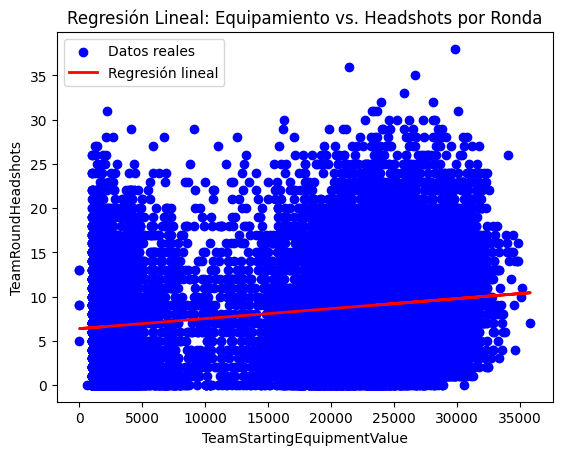

In [108]:
plt.scatter(X_test, y_test, color="blue", label="Datos reales")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regresión lineal")
plt.xlabel("TeamStartingEquipmentValue")
plt.ylabel("TeamRoundHeadshots")
plt.title("Regresión Lineal: Equipamiento vs. Headshots por Ronda")
plt.legend()
plt.show()


MSE (37.52): Indica una alta diferencia promedio entre los valores reales y los predichos, lo que sugiere que el modelo tiene un error considerable.

R² (0.03): Solo el 3% de la variabilidad de los headshots es explicada por el equipamiento inicial, lo que indica que la relación entre ambas variables es débil.

Coeficiente de regresión (0.0001): La pendiente casi nula muestra que el equipamiento inicial tiene un impacto insignificante en la cantidad de headshots.

Intercepción (6.3668): Predice un número de headshots poco realista incluso cuando el equipamiento es cero, lo que sugiere que otros factores son más relevantes.

Análisis visual:
La dispersión de los puntos en el gráfico muestra que no hay una tendencia clara entre el equipamiento y los headshots.

La línea de regresión apenas se inclina, lo que confirma la falta de relación significativa entre las variables.

Existen valores extremos y una alta variabilidad, lo que sugiere que otros factores pueden estar influyendo en los resultados.

Conclusión general: El modelo no es viable, ya que el equipamiento inicial no tiene una relación clara con los headshots. Para mejorar la predicción, sería mejor explorar modelos con múltiples variables o enfoques más complejos.